In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from cymr import models
from cymr import network
from cymr import fit
from cfr import framework
from psifr import fr

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'benchmark.csv')
patterns_file = os.path.join(model_dir, 'cfr_patterns.hdf5')

wp = framework.model_variant(['loc', 'cat', 'use'])
wp.free['w1'] = (0, 1)
res_name = 'cmr_fcf-loc-cat-use_w10-100'
res_dir = os.path.join(model_dir, 'recovery', res_name)
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

In [2]:
data = pd.read_csv(data_file)
study_data = data.loc[data['trial_type'] == 'study']
patterns = network.load_patterns(patterns_file)
model = models.CMRDistributed()

In [3]:
results = model.parameter_recovery(study_data, 10, wp.fixed, wp.free, 
                                   wp.dependent, patterns=patterns, 
                                   weights=wp.weights, n_rep=10, n_jobs=6, 
                                   tol=0.0001)

In [4]:
results.to_csv(os.path.join(res_dir, 'recovery.csv'))
wp.to_json(os.path.join(res_dir, 'parameters.json'))
results

Afc  Acf  Aff  Dff    T       Lfc       Lcf        P1        P2  \
0 sim    0    0    0    1  0.1  0.870916  0.376371  3.183724  0.512571   
  fit    0    0    0    1  0.1  0.498455  0.648386  3.528201  2.600690   
1 sim    0    0    0    1  0.1  0.417877  0.947941  3.424202  5.013598   
  fit    0    0    0    1  0.1  0.731019  0.379887  4.504313  2.708670   
2 sim    0    0    0    1  0.1  0.561175  0.505583  3.861887  1.322466   
  fit    0    0    0    1  0.1  0.936591  0.078853  2.135121  4.486590   
3 sim    0    0    0    1  0.1  0.436750  0.742272  7.454985  0.634366   
  fit    0    0    0    1  0.1  0.369389  0.781423  8.991773  0.824629   
4 sim    0    0    0    1  0.1  0.787161  0.132736  7.689486  0.749805   
  fit    0    0    0    1  0.1  0.273355  0.788048  3.446685  1.479370   
5 sim    0    0    0    1  0.1  0.346369  0.153870  0.724007  1.925629   
  fit    0    0    0    1  0.1  0.612449  0.232081  0.829030  3.066960   
6 sim    0    0    0    1  0.1  0.798821  0.144525  5.260461  2.602617   
  fit    0    0    0    1  0.1  0.942516  0.168030  9.195325  2.967300   
7 sim    0    0    0    1  0.1  0.362215  0.218424  3.306423  3.964760   
  fit    0    0    0    1  0.1  0.115940  0.210990  2.508583  3.667180   
8 sim    0    0    0    1  0.1  0.639695  0.533513  5.321609  1.067176   
  fit    0    0    0    1  0.1  0.822117  0.371644  5.838840  1.115904   
9 sim    0    0    0    1  0.1  0.103977  0.777794  2.178253  1.452490   
  fit    0    0    0    1  0.1  0.547867  0.733218  9.964267  3.203381   

          B_enc  ...     B_rec        X1        X2        w0        w1  \
0 sim  0.101493  ...  0.951106  0.999935  0.915504  0.242003  0.352820   
  fit  0.355207  ...  0.349432  1.000000  0.471844  0.858778  0.320290   
1 sim  0.121514  ...  0.906978  0.287604  1.502988  0.336276  0.702559   
  fit  0.608517  ...  0.036375  0.303333  1.436953  0.656689  0.400686   
2 sim  0.524042  ...  0.878378  0.521422  4.033886  0.308542  0.119281   
  fit  0.102772  ...  0.828902  0.540000  4.656791  0.773486  0.332504   
3 sim  0.718359  ...  0.108270  0.790099  0.657080  0.274536  0.453908   
  fit  0.079057  ...  0.714315  0.780000  2.313775  0.909712  0.991811   
4 sim  0.689964  ...  0.296120  0.991034  0.015995  0.391007  0.394156   
  fit  0.175990  ...  0.709554  0.986667  2.338370  0.773169  0.442674   
5 sim  0.863041  ...  0.024728  0.685786  3.902146  0.618034  0.868160   
  fit  0.994822  ...  0.508305  0.680000  2.477234  0.913530  0.151079   
6 sim  0.880080  ...  0.651503  0.546732  0.167838  0.883170  0.371148   
  fit  0.891751  ...  0.659704  0.534884  0.169317  0.976967  0.539061   
7 sim  0.667245  ...  0.198505  0.107831  1.009455  0.494501  0.668088   
  fit  0.725498  ...  0.000000  0.125845  0.908019  0.462522  0.367055   
8 sim  0.924255  ...  0.366546  0.224033  0.067792  0.247603  0.492051   
  fit  0.893729  ...  0.353913  0.209771  0.075007  0.204883  0.474889   
9 sim  0.598542  ...  0.528369  0.869956  3.631485  0.728318  0.803926   
  fit  0.299135  ...  0.918857  0.866667  3.451705  0.014875  0.826566   

            Dfc       Dcf     w_loc     w_cat     w_use  
0 sim  0.129084  0.623629  0.242003  0.757997  0.352820  
  fit  0.501545  0.351614  0.858778  0.141222  0.320290  
1 sim  0.582123  0.052059  0.336276  0.663724  0.702559  
  fit  0.268981  0.620113  0.656689  0.343311  0.400686  
2 sim  0.438825  0.494417  0.308542  0.691458  0.119281  
  fit  0.063409  0.921147  0.773486  0.226514  0.332504  
3 sim  0.563250  0.257728  0.274536  0.725464  0.453908  
  fit  0.630611  0.218577  0.909712  0.090288  0.991811  
4 sim  0.212839  0.867264  0.391007  0.608993  0.394156  
  fit  0.726645  0.211952  0.773169  0.226831  0.442674  
5 sim  0.653631  0.846130  0.618034  0.381966  0.868160  
  fit  0.387551  0.767919  0.913530  0.086470  0.151079  
6 sim  0.201179  0.855475  0.883170  0.116830  0.371148  
  fit  0.057484  0.831970  0.976967  0.023033  0.539061  
7 sim  0.637785  0.781576  

In [5]:
results.index.rename(['sample', 'source'], inplace=True)
melted = results.reset_index().melt(id_vars=['sample', 'source'], 
                                    var_name='parameter', value_name='value')
unstacked = melted.set_index(['sample', 'parameter', 'source']).unstack().reset_index()
df = pd.DataFrame({'sample': unstacked['sample'], 
                   'parameter': unstacked['parameter'],
                   'fit': unstacked.loc[:, 'value']['fit'],
                   'sim': unstacked.loc[:, 'value']['sim']})
filt = df.loc[df['parameter'].isin(list(wp.free.keys()))]

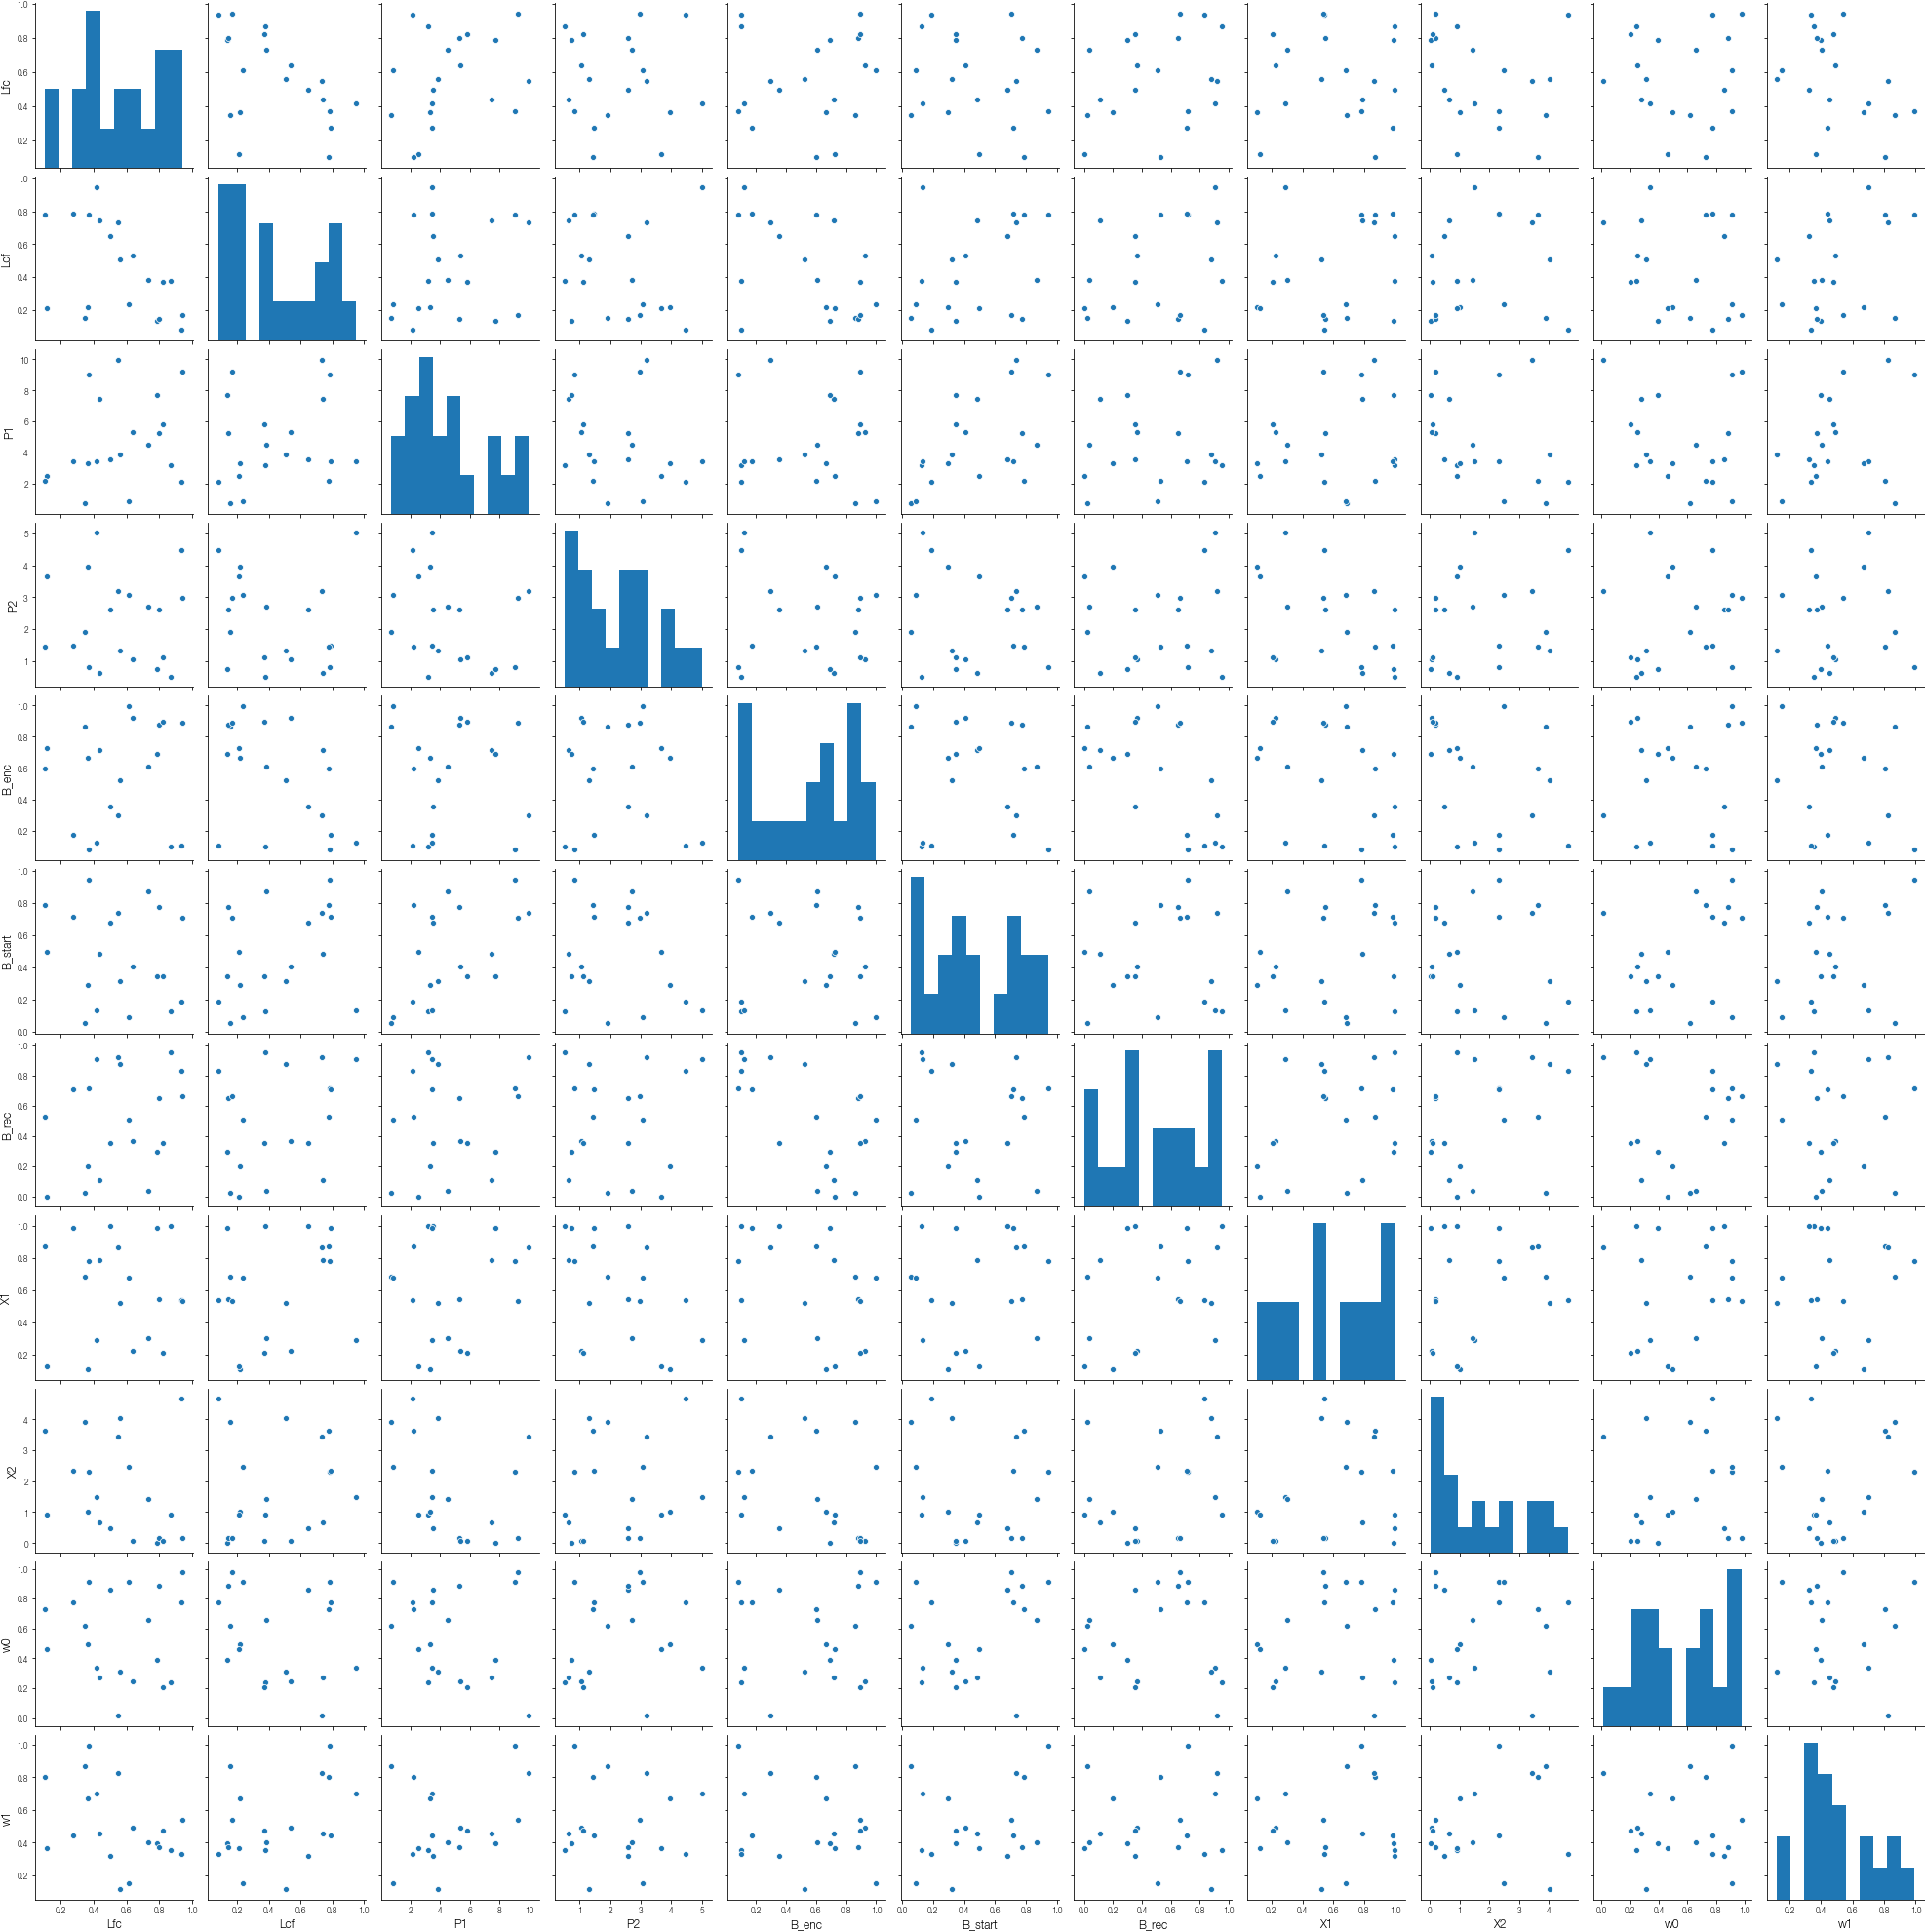

In [6]:
sns.pairplot(results.filter(wp.free.keys()));

In [7]:
small = [var for var in wp.free.keys() if wp.free[var][1] <= 1]
large = [var for var in wp.free.keys() if wp.free[var][1] > 1]

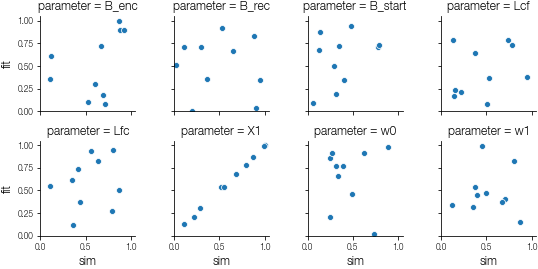

In [8]:
g = sns.relplot(kind='scatter', x='sim', y='fit', 
                col='parameter', col_wrap=4, height=2,
                data=filt.loc[filt['parameter'].isin(small)]);
g.set(xlim=(0, 1.05), ylim=(0, 1.05), aspect=1);
g.savefig(os.path.join(res_dir, 'param_small.pdf'))

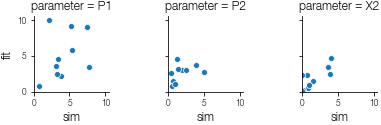

In [9]:
g = sns.relplot(kind='scatter', x='sim', y='fit', 
                col='parameter', col_wrap=4, height=2,
                data=filt.loc[filt['parameter'].isin(large)]);
g.set(xlim=(0, 10.5), ylim=(0, 10.5), aspect=1);
g.savefig(os.path.join(res_dir, 'param_large.pdf'))